# Gradient Decent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

To have an intuitive idea about how Gradient Decent work, Imagine you're at the top of the highest peak in a park. Your friends have dared you to reach the lowest point in the park (assuming their is only one lowest point in whole park) blindfolded from the top. You accepted their challenge and you are ready to begin at the top of the peak. Their are two ways in which you can proceed:

- <b>Naive Way</b>: You start moving in the direction you feel is correct without much thought. You may reach the lowest point, if you are lucky, but their are no guarentees.
- <b>Strategic Way</b>: You hover your feet all around yourself and feel where is the lowest point around you in one step. You take a step in that direction and repeat the process until everything around you feel at the same heighjt and stop at that point. This way you are guarenteed to reach the lowest point.

The second alternative is known as Gredient Decent. The algorithm takes one step at a time in the direction of most negative gradient, the lowest point around current position along the cost function and repeat the process.

## Example
Consider the following function we want to optimize
<br>
<font size="4">
$$
y = (x - 3)^2 + 4
$$
</font>

The gradient of the function at a point $x_0$ is the derivative of the function at $x_0$ that is $y'(x_0)$. The negative of this gradient points in the direction of the lowest point around $x$, the current point.
We use this negative gradient to find out the next lowest point in the direction of minimum, updating $x$ as

<font size="4">
$$
x_{n+1} = x_n - \alpha y'(x_n)
$$
</font>

where $y'(x)$ is defined as, for equation for $y$
<br><br>
<font size="4">
$$
y'(x) = 2(x - 3)
$$
</font>
<br>
and $\alpha$ is called as `Learning rate`, it signifies how big of a step we want to take in the chosen direction.
<br><br>
Let's first plot the equation and after that we will see how gradient decent tries to find the minimum.

## Importing necessary libraries

- <b>numpy</b> : NumPy is the fundamental package for scientific computing with Python. For all major mathematical computations we afre going to use numpy
<br>
- <b>matplotlib.pyplot</b> : Matplotlib is a Python 2D plotting library.  We are going to use this every now and then to visually plot our data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Coding our equation and its derivative

In [2]:
def func_y(x):
    '''
        Arguments:
        - x :
            point x to find corresponding y
    '''
    return (x - 3) ** 2 + 4

In [3]:
def func_y_derivative(x):
    return 2 * (x - 3)

Generating some random points and ploting our function

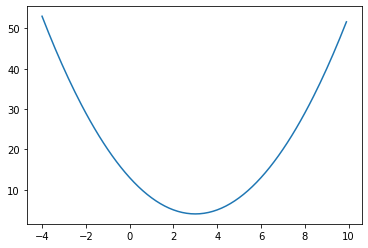

In [4]:
x_values = np.arange(-4, 10, 0.1) #<- equispaces x values between -4 and 10
y_values = func_y(x_values) #<- corresponding y values

plt.plot(x_values, y_values) #<- Plotting our graph

As we see, its a convex function, The amazing property of a convex function is that it only have a global minimum, therefore whenever we reach the minimum, its the lowest we can get for that function.

### Gradient Decent
Let's code the gradient decent function and start optimizing!

In [5]:
def gradient_descent(start_x, learning_rate, epoch, main_func, gd_func):
    '''
        Arguments:
        - start_x : 
            initial position to start optimizing
        - learning_rate :
            Step size
        - epoch:
            Number of itrations to perform
        - main_func:
            function to optimize
        - gd_func:
            function which calculate the derivative of the original function
    '''
    
    # Book Keeping gradient values
    x_gd = []
    y_gd = []
    x_gd.append(start_x)
    y_gd.append(main_func(start_x))

    current_x = start_x
    # begin the loops to update x and y
    for i in range(epoch):
        grad = gd_func(current_x)
        next_x = current_x - learning_rate * (grad) #<- Update step
        x_gd.append(next_x)
        y_gd.append(main_func(next_x))

        # update current_x
        current_x = next_x

    return x_gd, y_gd

Let's Start optimizing

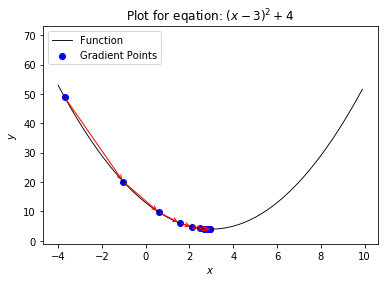

In [6]:
# some Variables you can play with
x0 = -3.7 #<- Initial point
learning_rate = 0.2 #<- Learning rate, play around with its value to see its effect
epoch = 10 #<- Number of iterations

x_gd, y_gd = gradient_descent(x0, learning_rate, epoch, func_y, func_y_derivative) #<- Runing gradient descent

# Plotting results
plt.plot(x_values, y_values, lw = 0.9, color = 'k', label="Function")
plt.scatter(x_gd, y_gd, c = 'b', label="Gradient Points")

# Don't worry about this bit, its just beautifying the plot
plt.ylim([min(y_values) - 5, max(y_values) + 20])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot for eqation: $(x-3)^2 + 4$')
plt.legend(loc="upper left")
for i in range(1, epoch+1):
    plt.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

### Learning Rate
<b>Learning rate</b> specifies how big of a step you take on finding most negative gradient. Setting up of Learning rate is an important aspect of optimization as if the learning rate is too high, we can go pass the minimum point i.e. we may overshoot. In Contrast if we set the learning rate too low, we may never reach the minimum point as we are moving very slow.
The comparision of different learning rates is shown below.

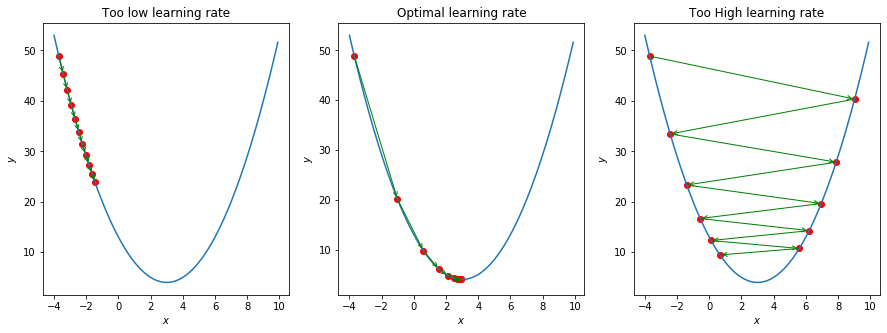

In [31]:
lr0 = 0.02 #<- Learning rate, Too Low
lr1 = 0.2 #<- Learning rate, Optimal
lr2 = 0.95 #<- Learning rate, Too High

x_gd0, y_gd0 = gradient_descent(x0, lr0, epoch, func_y, func_y_derivative) #<- Runing gradient descent
x_gd1, y_gd1 = gradient_descent(x0, lr1, epoch, func_y, func_y_derivative) #<- Runing gradient descent
x_gd2, y_gd2 = gradient_descent(x0, lr2, epoch, func_y, func_y_derivative) #<- Runing gradient descent

# Plotting results for different learning rates
fig = plt.figure(figsize=(15, 5))
ax0 = fig.add_subplot(131)
ax0.plot(x_values, y_values)
ax0.scatter(x_gd0, y_gd0, c='r')

ax1 = fig.add_subplot(132)
ax1.plot(x_values, y_values)
ax1.scatter(x_gd1, y_gd1, c='r')

ax2 = fig.add_subplot(133)
ax2.plot(x_values, y_values)
ax2.scatter(x_gd2, y_gd2, c='r')

# Don't worry about this bit, its just beautifying the plot
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_title("Too low learning rate")

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_title("Optimal learning rate")

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title("Too High learning rate")
for i in range(1, epoch+1):
    ax0.annotate('', xy=(x_gd0[i], y_gd0[i]), xytext=(x_gd0[i-1], y_gd0[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1},
                   va='center', ha='center')
    ax1.annotate('', xy=(x_gd1[i], y_gd1[i]), xytext=(x_gd1[i-1], y_gd1[i-1]),
               arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1},
               va='center', ha='center')
    ax2.annotate('', xy=(x_gd2[i], y_gd2[i]), xytext=(x_gd2[i-1], y_gd2[i-1]),
           arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1},
           va='center', ha='center')

### What does Local Minimum means?
In the definition of gredent decent, we stated that it finds a local minimum of a function. But the question is, What exactly is local Minimum?
Local minimum is actually a point on the function aroud which every other point is larger than that point. The term 'Local' here states that their may exist some other point, which have a lower value then the local minimum i.e. the point we just termed local minimum is the point lowest in its immediate surrounding, not in all over the function.
<br><br>
In our first example, their was only one lowest point on our function, thus the local minima was actually the global minimum. To understand the concept of local minimum, let's consider a more complex function such as
<br><br>
<font size="4">
$$
y = cos(x) - 2 cos^2(x)
$$
</font>
<br><br>
Let's plot the function and see how it is different from our previous example

In [32]:
def func_y_complex(x):
    return np.cos(x) - 2 * np.cos(x) ** 2

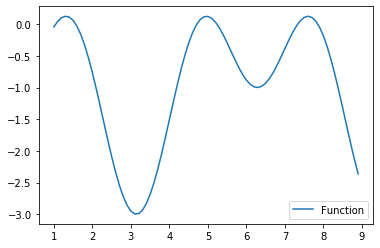

In [33]:
x_complex = np.arange(1, 9, 0.1)
y_complex = func_y_complex(x_complex)

plt.plot(x_complex, y_complex, label="Function")
plt.legend(loc="lower right")

As we can observe in the above graph, their are more peaks and valleys in our graph. There are two valleys on our graph, the valley in which gradient decent will take us depends on the initial point we choose.
<br>
Let's first define the gradient function for our new and complex function, which is given as
<br><br>
<font size="4">
$$
y'(x) = - sin(x) + 2 sin(2 x) 
$$
</font>

In [34]:
def func_y_complex_derivative(x):
    return - np.sin(x) + 2 * np.sin(2 * x)

Now lets run, the Gredient Decent on our new function and see how the starting point affect our final position

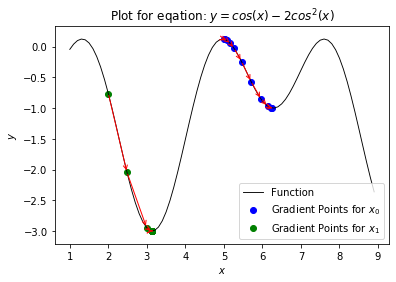

In [35]:
# Again some Variables you can play with
x0 = 5 #<- Initial point 1
x1 = 2 #<- Initial point 2
learning_rate = 0.2 #<- Learning rate, play around with its value to see its effect
epoch = 10 #<- Number of iterations

x_gd_0, y_gd_0 = gradient_descent(x0, learning_rate, epoch, 
                                  func_y_complex, func_y_complex_derivative) #<- Runing gradient descent with point 1
x_gd_1, y_gd_1 = gradient_descent(x1, learning_rate, epoch,
                                  func_y_complex, func_y_complex_derivative) #<- Runing gradient descent with point 2

# Plotting results
plt.plot(x_complex, y_complex, lw = 0.9, color = 'k', label="Function")
plt.scatter(x_gd_0, y_gd_0, c = 'b', label="Gradient Points for $x_0$")
plt.scatter(x_gd_1, y_gd_1, c = 'g', label="Gradient Points for $x_1$")


# Don't worry about this bit, its just beautifying the plot
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot for eqation: $y = cos(x) - 2 cos^2(x)$')
plt.legend(loc="lower right")
for i in range(1, epoch+1):
    plt.annotate('', xy=(x_gd_0[i], y_gd_0[i]), xytext=(x_gd_0[i-1], y_gd_0[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.annotate('', xy=(x_gd_1[i], y_gd_1[i]), xytext=(x_gd_1[i-1], y_gd_1[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

As we can observe from above plot, when we start at point $x_0$ we reach a minimum point but its not the Global Minimum i.e. Local Minimum. But When we start at point $x_1$, we reach at Global Minimum.
Thus we can conclude that initial point is as import parameter as is learning rate and epoch.

## End Notes
So, now i hope you know what Gredient Decent is and how it works, its the most simplest optimization algorithm used in Machine Learning. In coming models, we will see different advanced optimization algorithms that use techniques like 'Momentum', 'Learning Rate schduler', etc but the base idea remains the same.